In [6]:
import matplotlib.pyplot as plt
import scipy
import numpy as np
import time

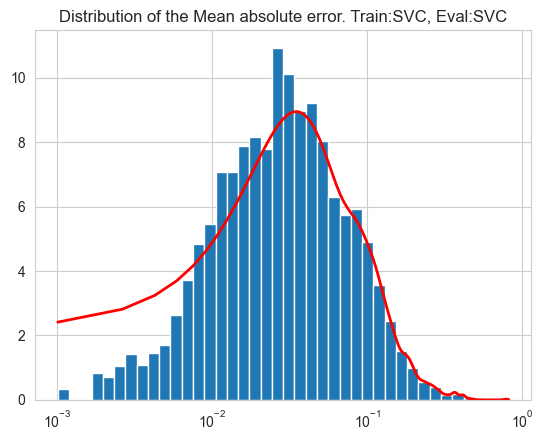

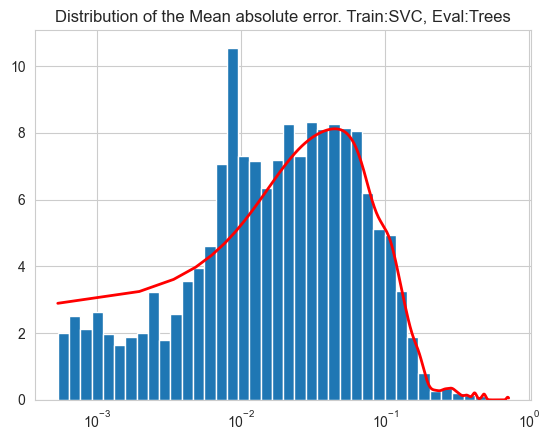

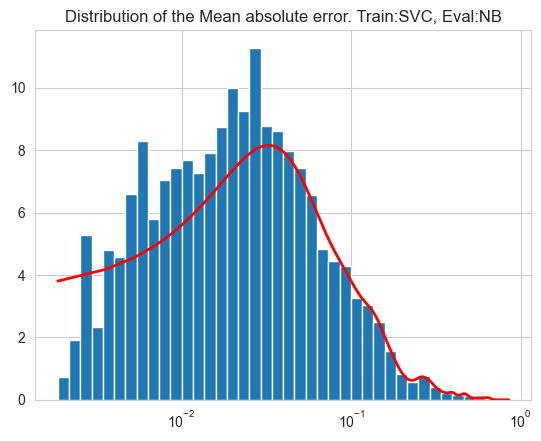

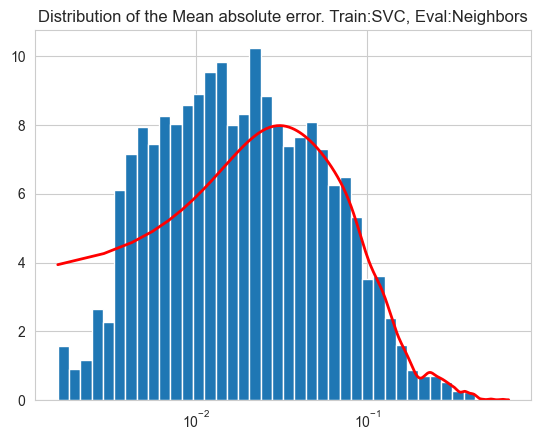

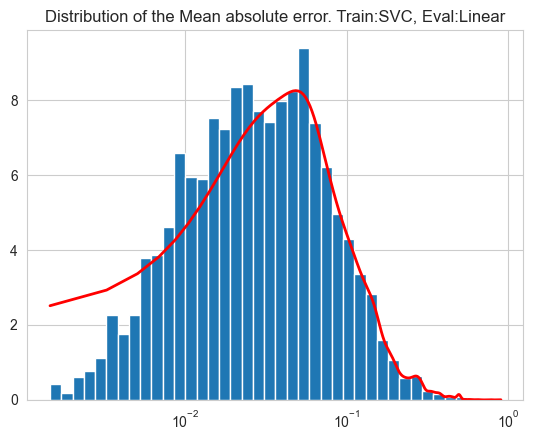

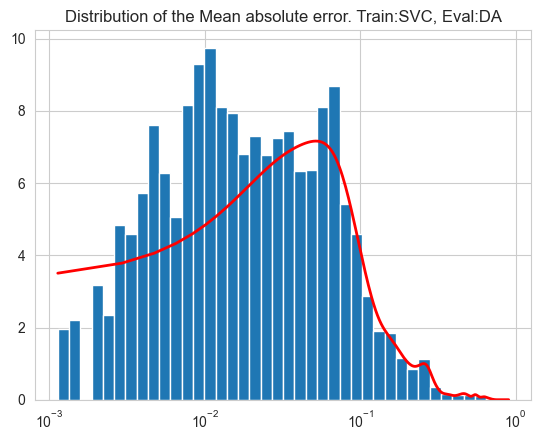

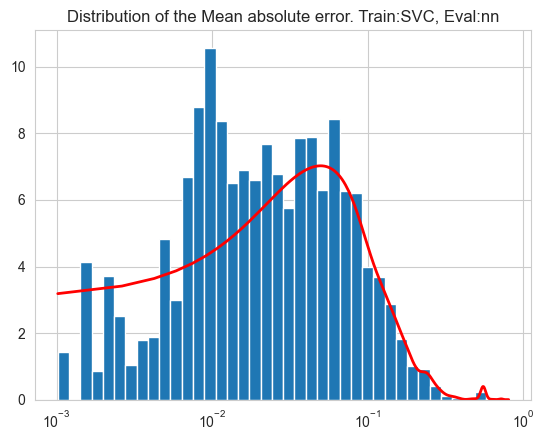

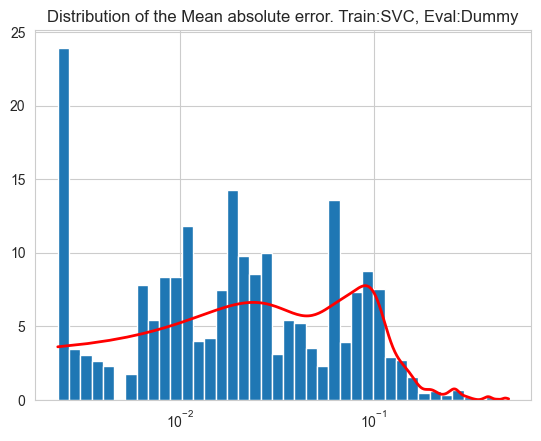

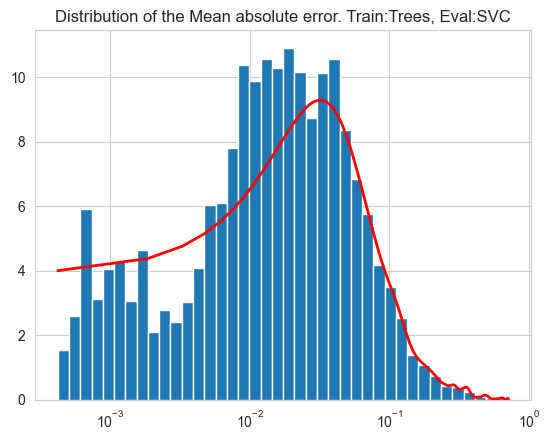

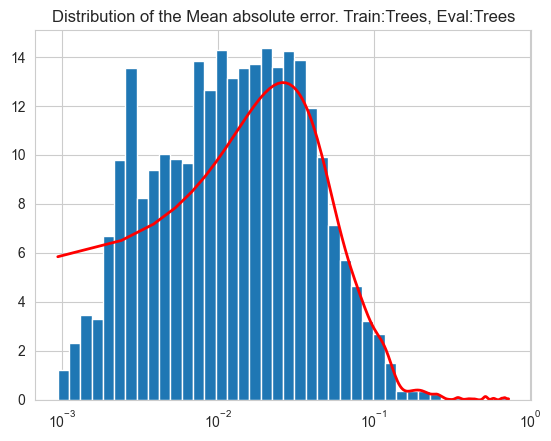

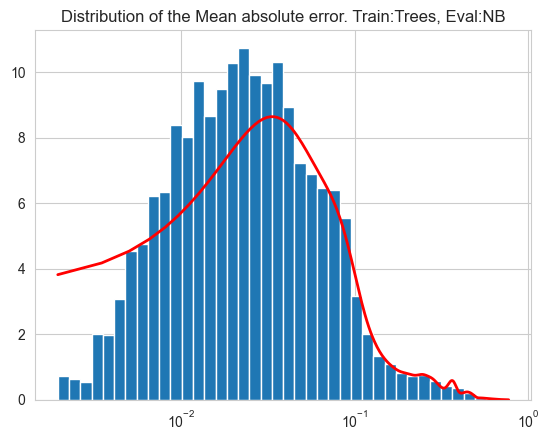

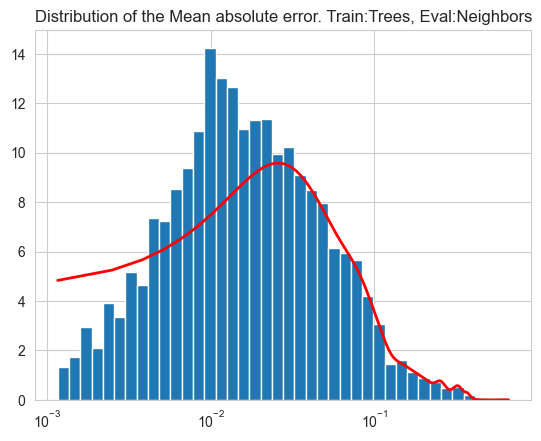

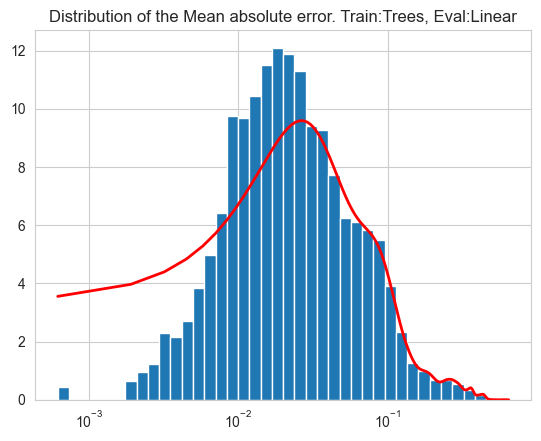

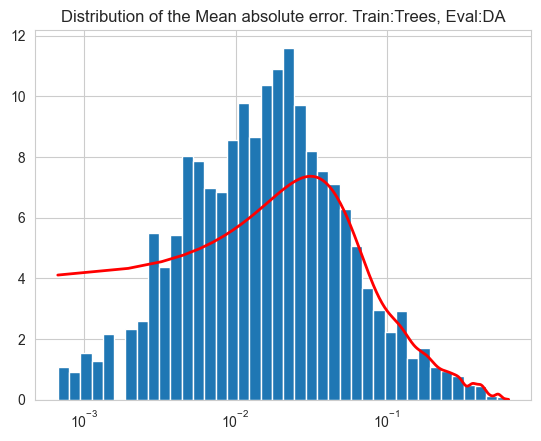

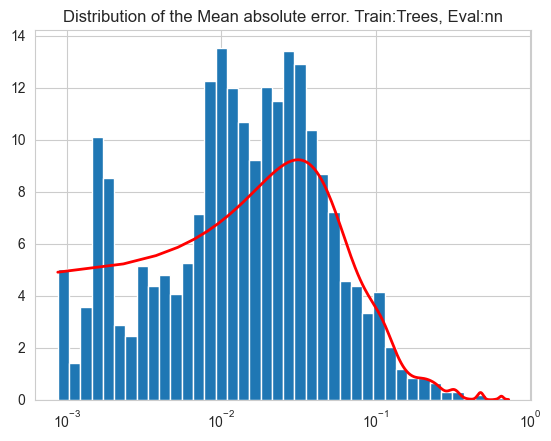

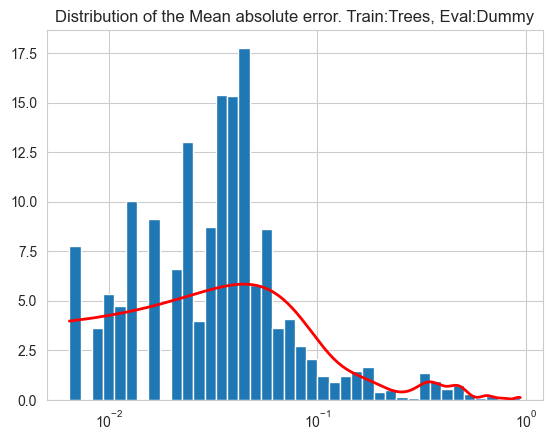

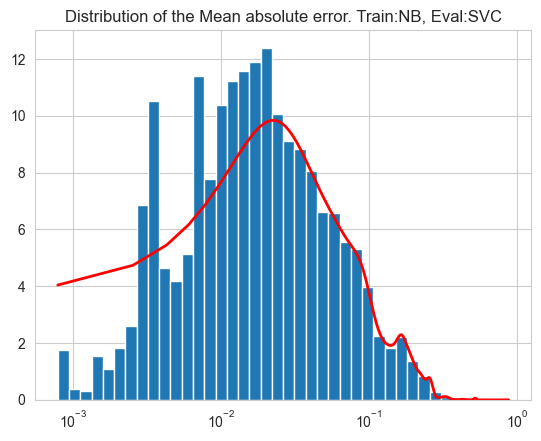

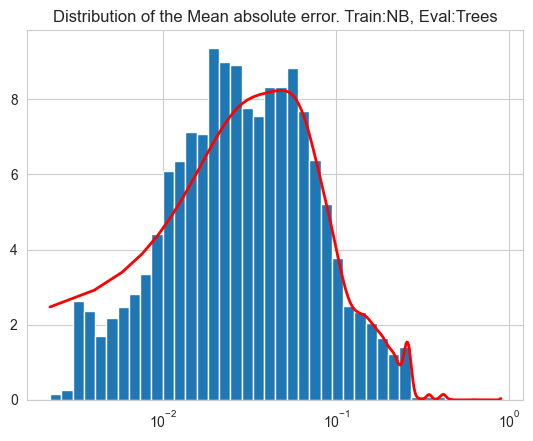

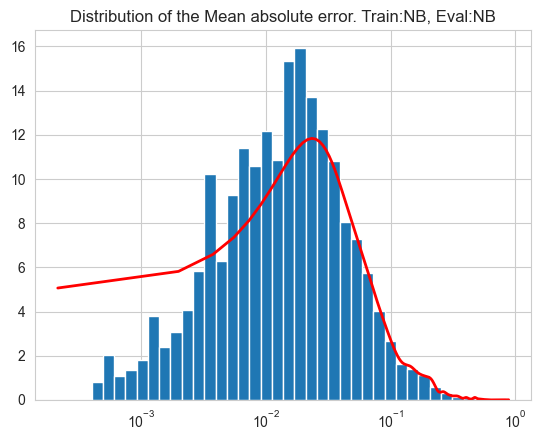

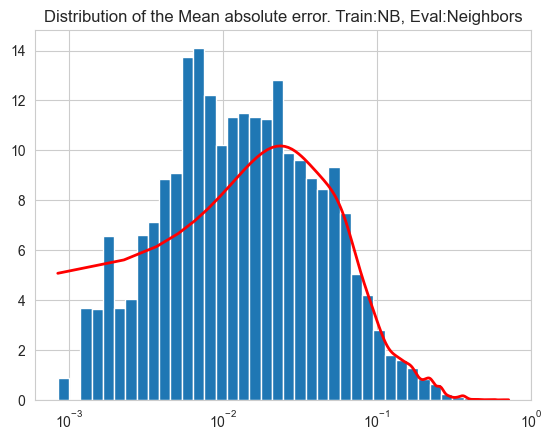

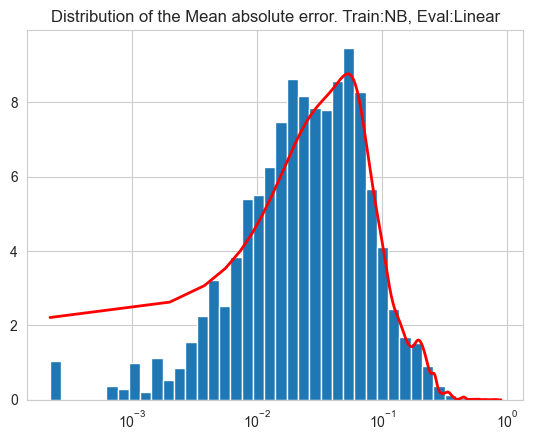

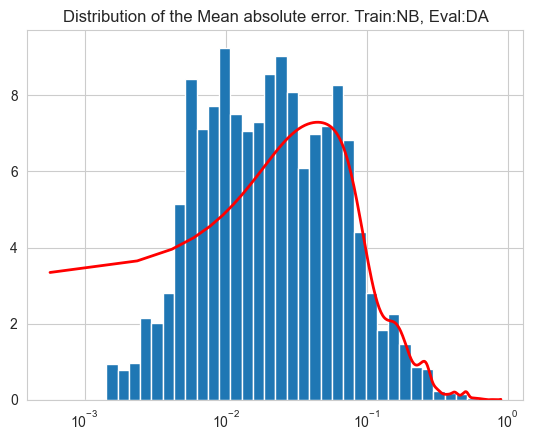

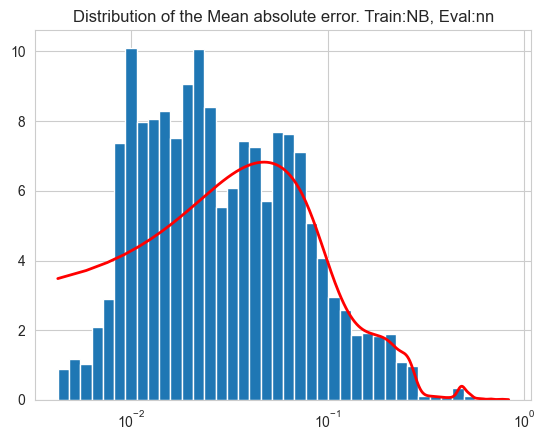

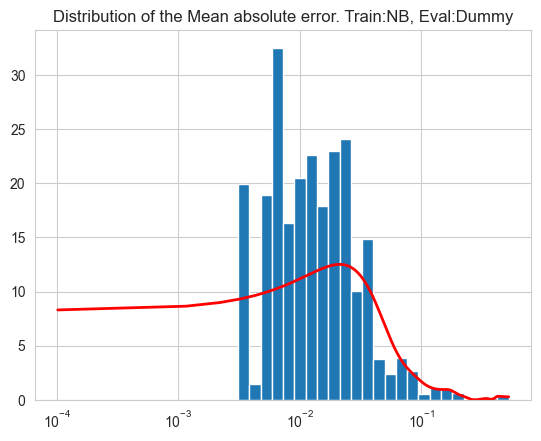

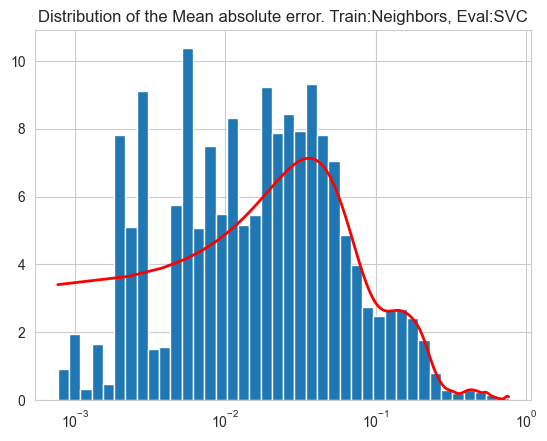

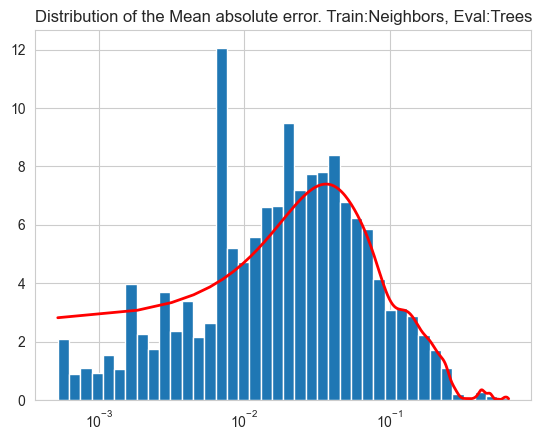

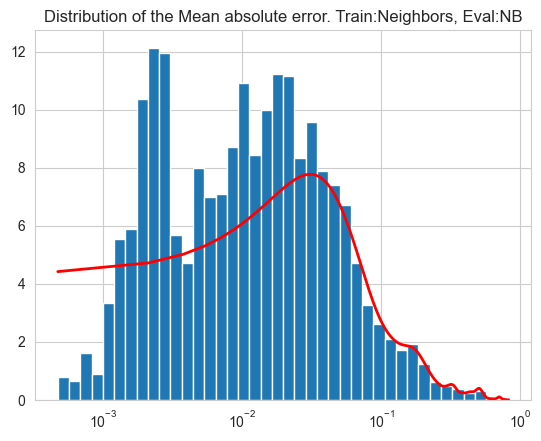

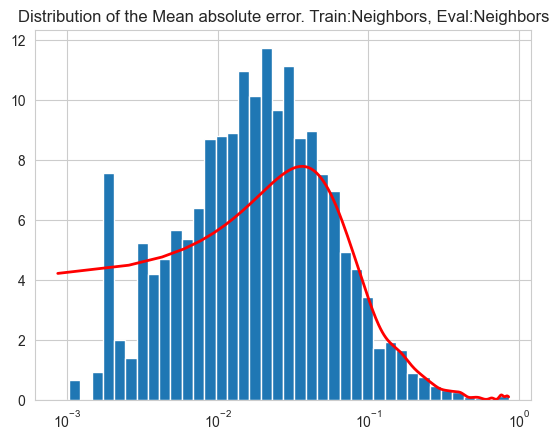

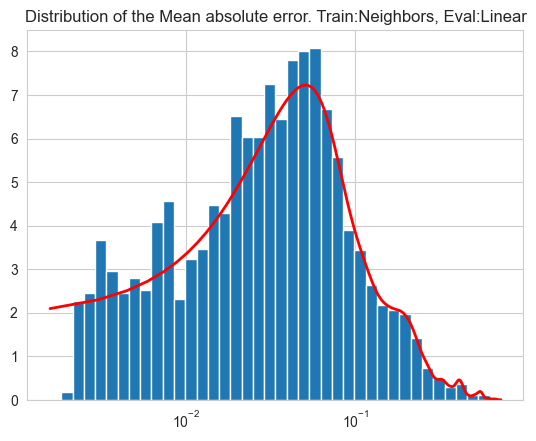

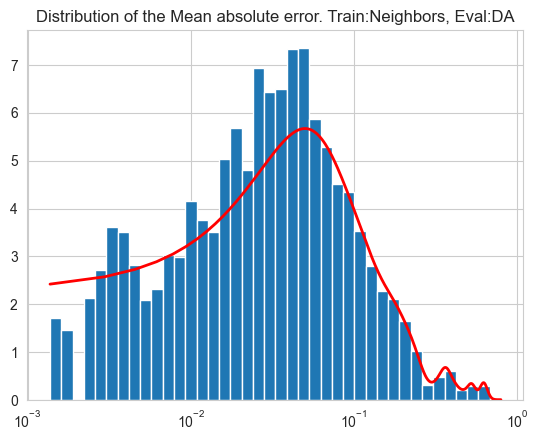

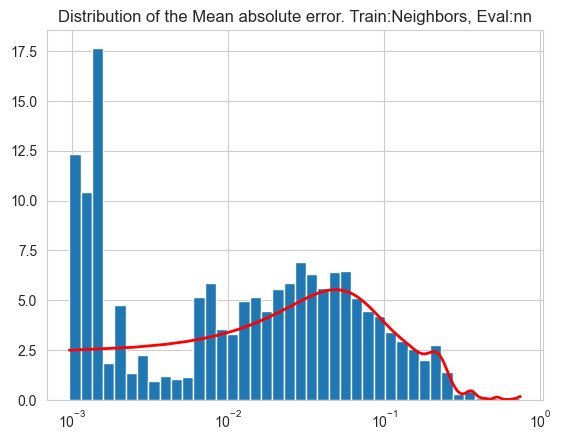

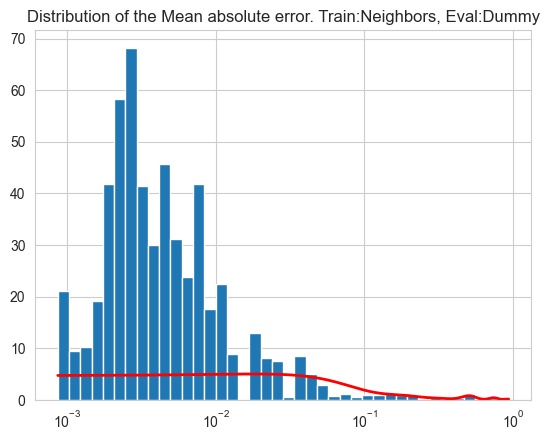

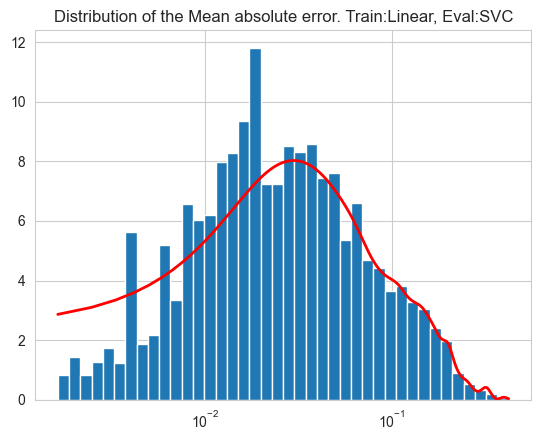

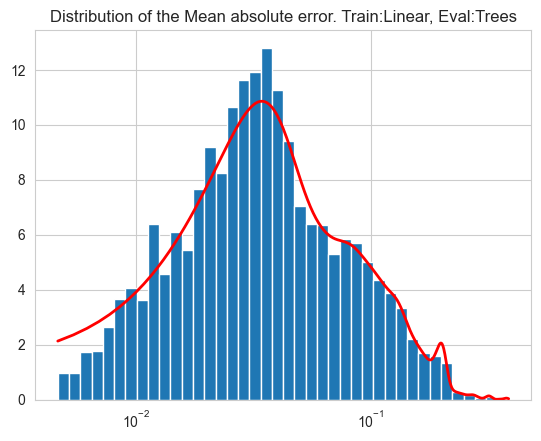

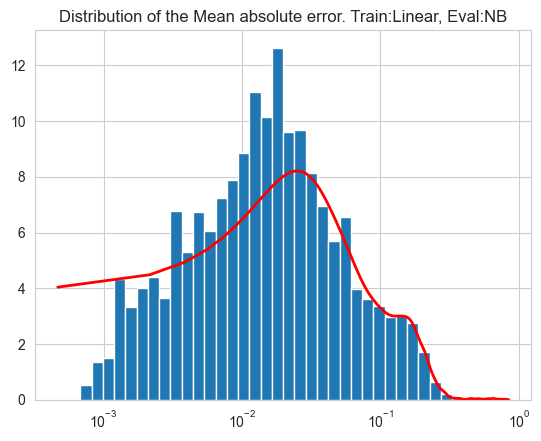

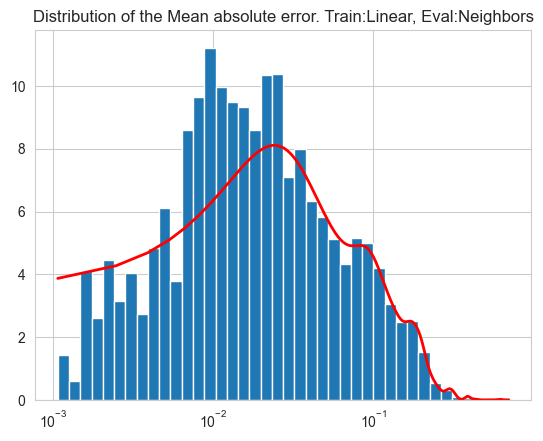

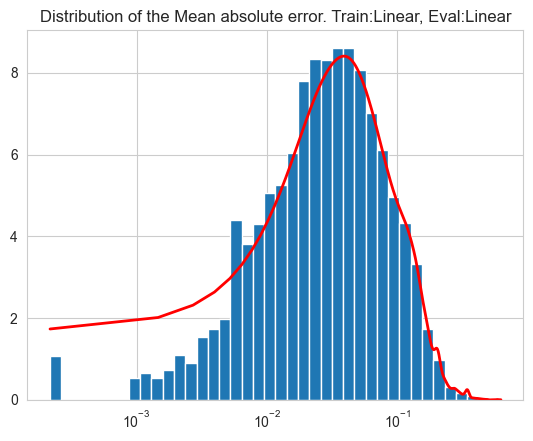

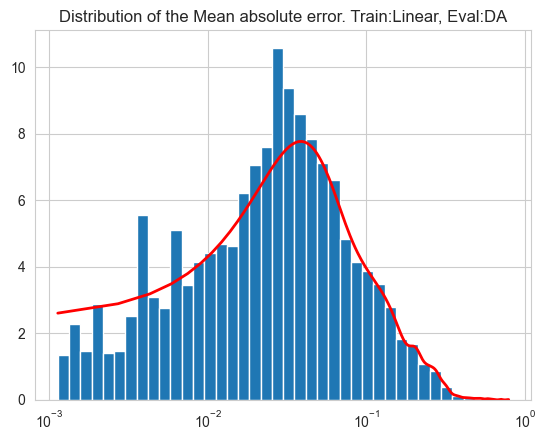

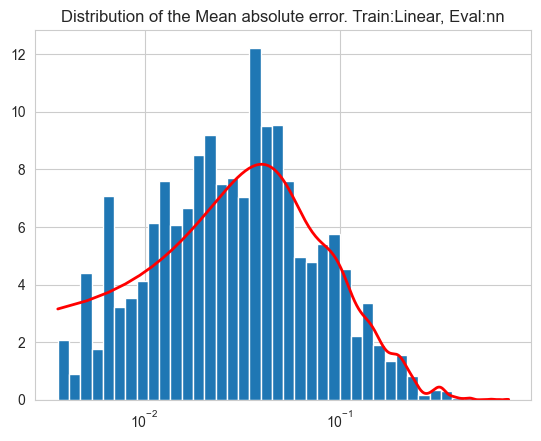

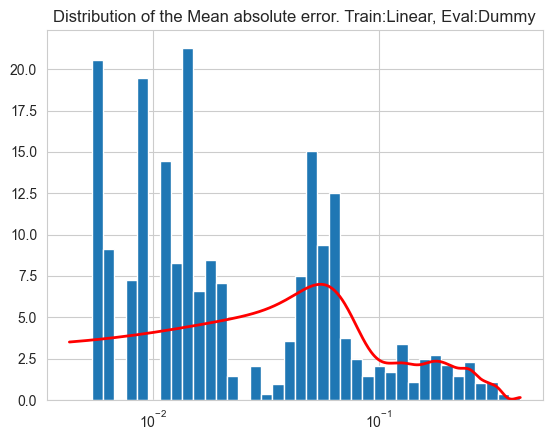

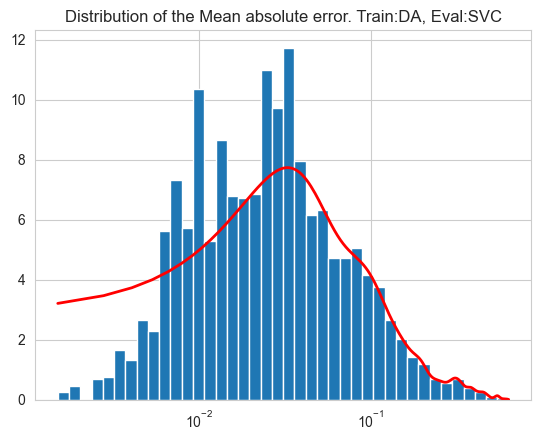

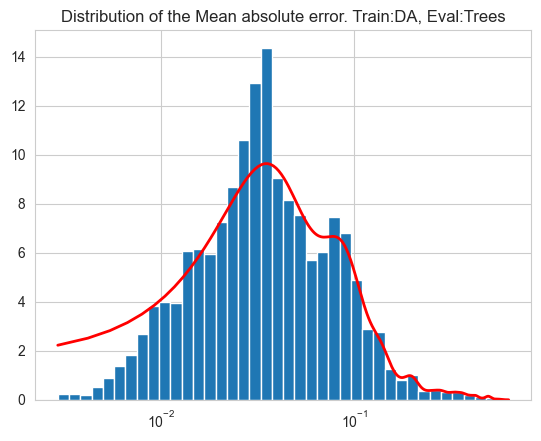

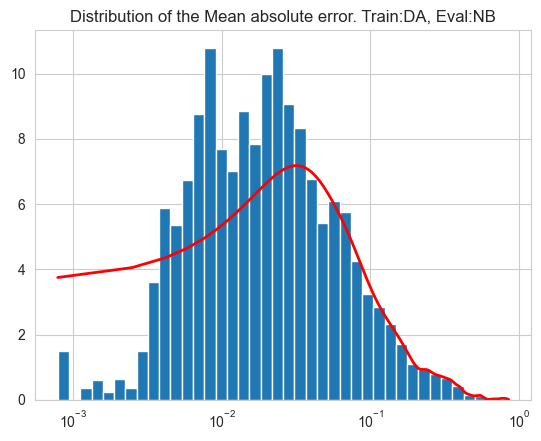

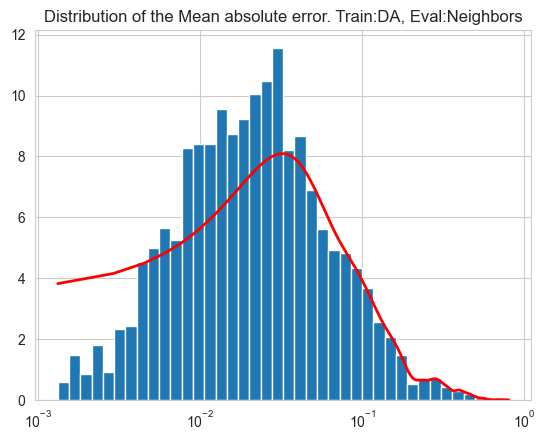

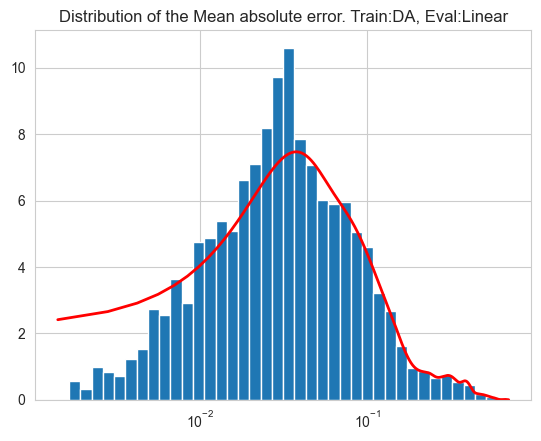

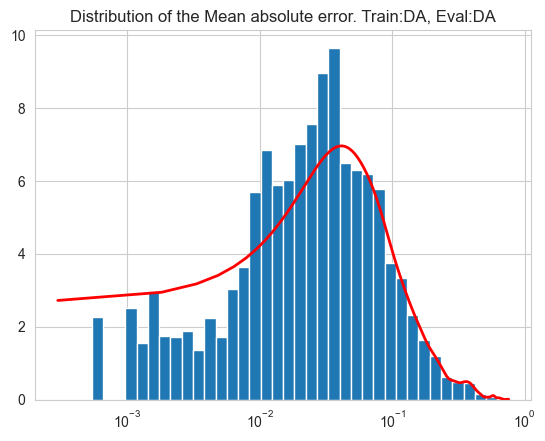

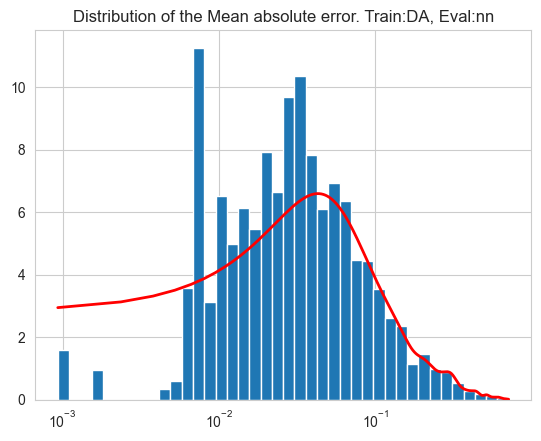

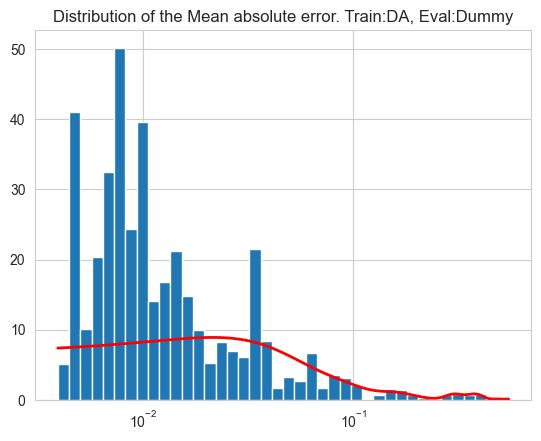

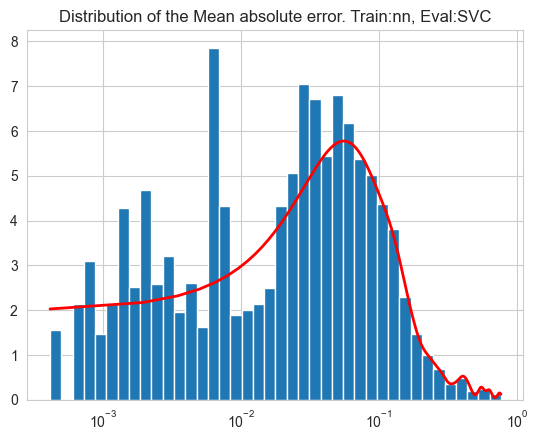

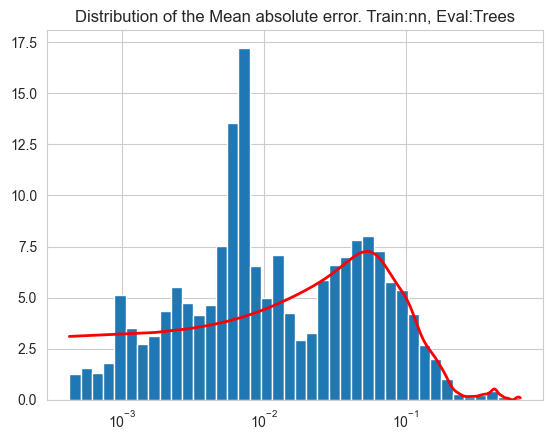

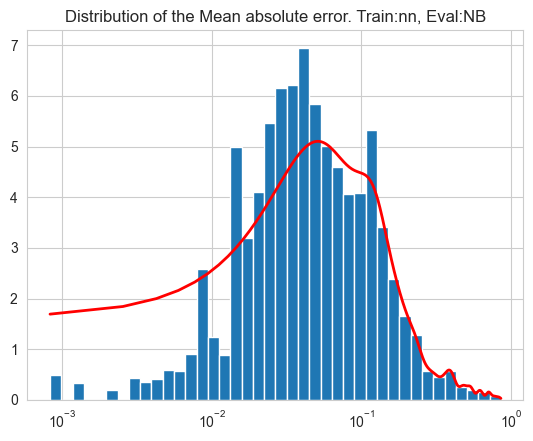

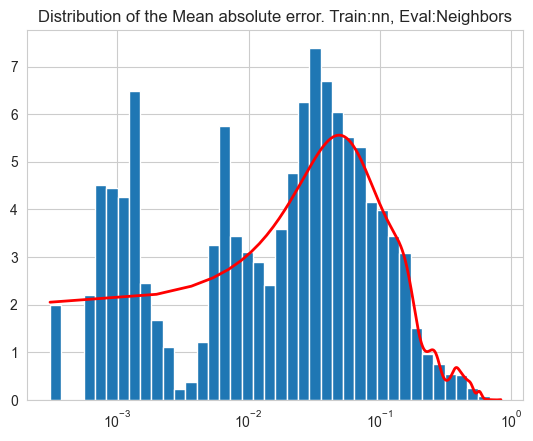

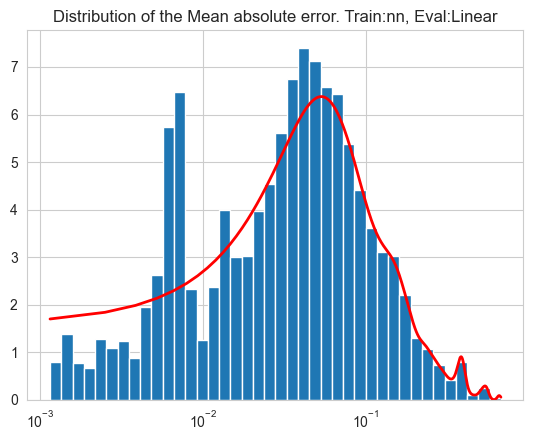

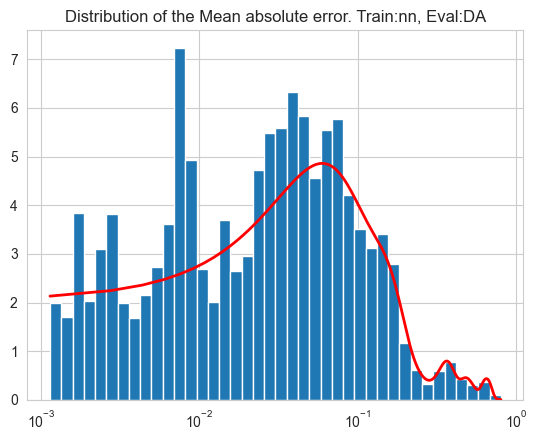

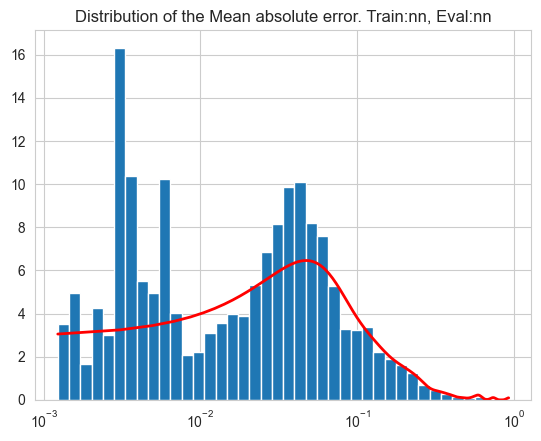

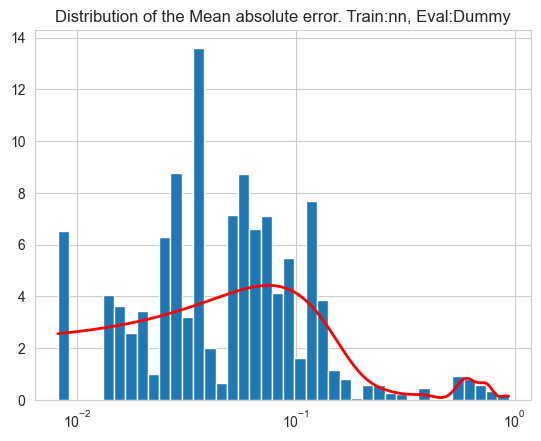

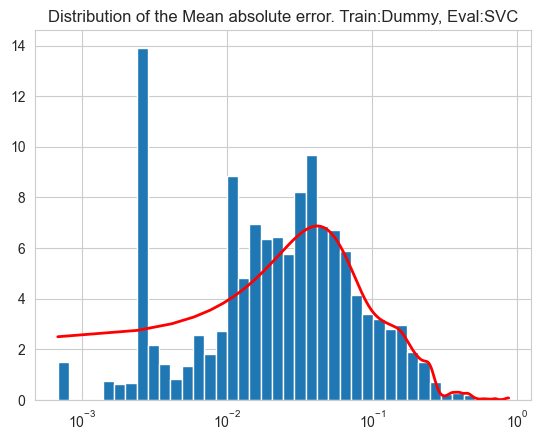

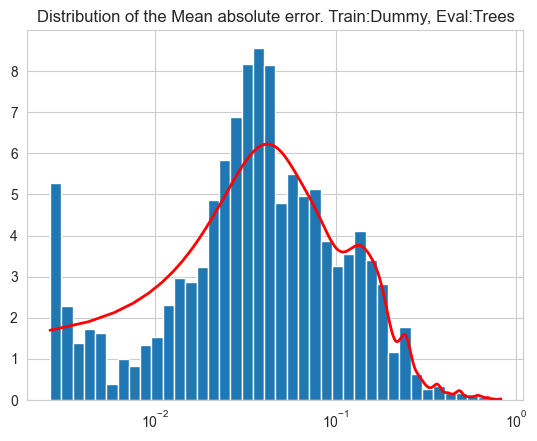

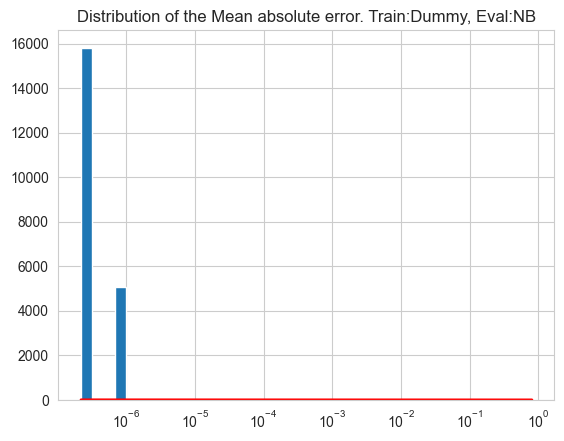

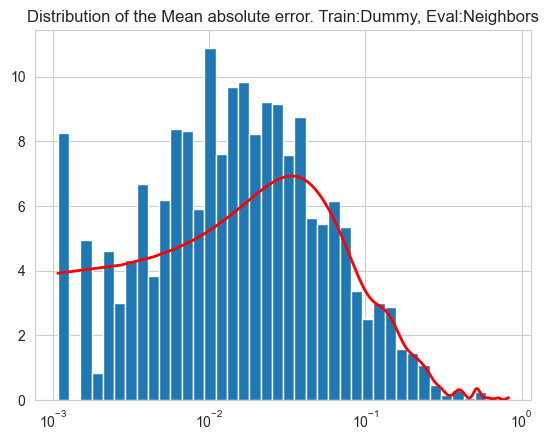

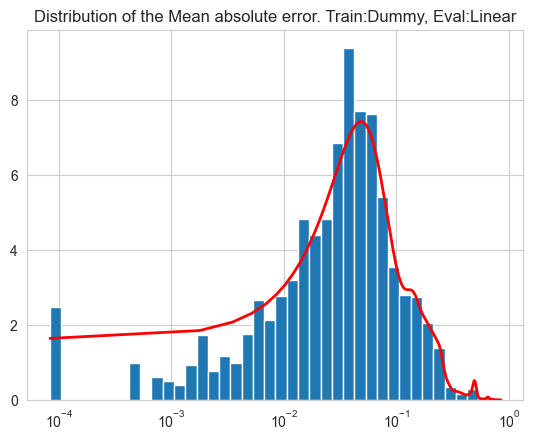

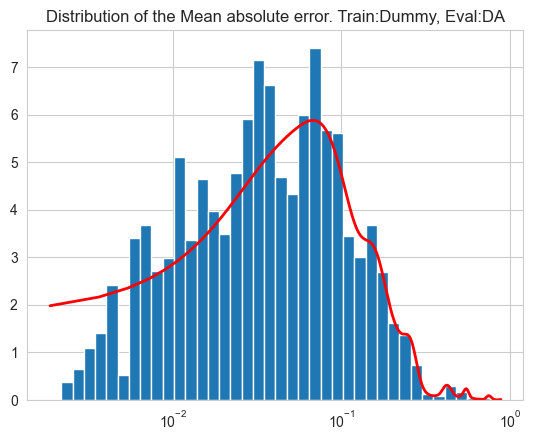

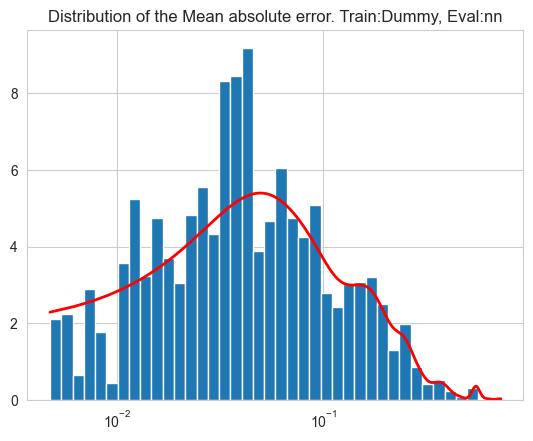

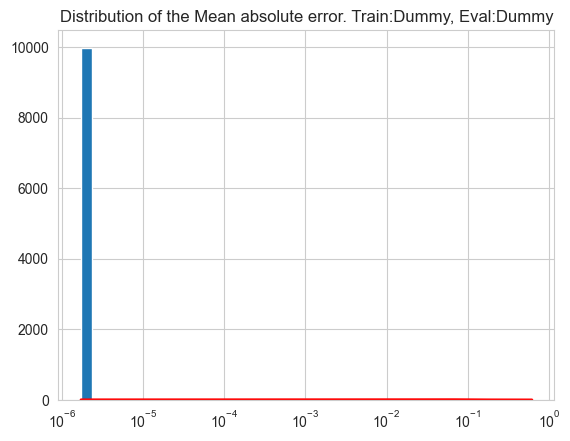

In [7]:
groups = {"SVC": 0, "Trees": 1, "NB": 2, "Neighbors":3, "Linear":4, "DA":5, "nn":6, "Dummy":7}
labels = ["SVC", "Trees", "NB", "Neighbors", "Linear", "DA", "Network", "Dummy"]
dir = "experiment1/finalgraphs"

def create_MAE_hist(mean_absolute_errors):
    log_data = np.log10(mean_absolute_errors)
    n_bins = 40
    log_bins = np.linspace(min(log_data), max(log_data), n_bins + 1)
    bins = 10**log_bins
    plt.hist(mean_absolute_errors, bins=bins, density=True)
    plt.title(f"Distribution of the Mean absolute error. Train:{trained_on}, Eval:{eval_on}")
    
    kde = scipy.stats.gaussian_kde(mean_absolute_errors)
    x_vals = np.linspace(min(mean_absolute_errors), max(mean_absolute_errors), 500)
    plt.xscale("log")
    plt.plot(x_vals, kde(x_vals), 'r-', linewidth=2, label='KDE')

for trained_on in groups.keys():
    baseline_dir = f"experiment1/trained{trained_on}/eval{trained_on}/aggregate/data_summary_trained{trained_on}_eval{trained_on}.txt"
    with open(baseline_dir, 'r') as baseline_file:
            lines_baseline = baseline_file.readlines()
    baseline_population = eval(lines_baseline[0])
    
    for eval_on in groups.keys(): 
        file_dir = f"experiment1/trained{trained_on}/eval{eval_on}/aggregate/data_summary_trained{trained_on}_eval{eval_on}.txt"
        with open(file_dir, 'r') as file:
            lines = file.readlines()
            
        # print(trained_on + eval_on + lines[1])
        
        population_2 = eval(lines[0])
        
        create_MAE_hist(population_2)
        plt.show()
        time.sleep(0.5)
        
        